<a href="https://colab.research.google.com/github/moaadouhmad99-ops/DI_Bootcamp/blob/main/Week3/Day5/Mini_Project_W3_D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-Project : Marketing Strategy**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
df = pd.read_excel('US Superstore data.xls', sheet_name='Orders')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
# Drop exact duplicates
df_new = df.drop_duplicates()

# Ensure numeric columns
for col in ['Sales','Quantity','Discount','Profit']:
  df_new[col] = pd.to_numeric(df_new[col], errors='coerce')
df_new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
# Check missing values
print(df_new.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Drop rows missing critical info (Order ID, Customer ID, Sales)
df_new = df_new.dropna(subset=['Order ID','Customer ID','Sales'])
df_new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
# Add useful columns
df_new['Year'] = df_new['Order Date'].dt.year
df_new['Month'] = df_new['Order Date'].dt.month
df_new['Day'] = df_new['Order Date'].dt.day
df_new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,21
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,26
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,26
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,26


**Which states have the most sales?**

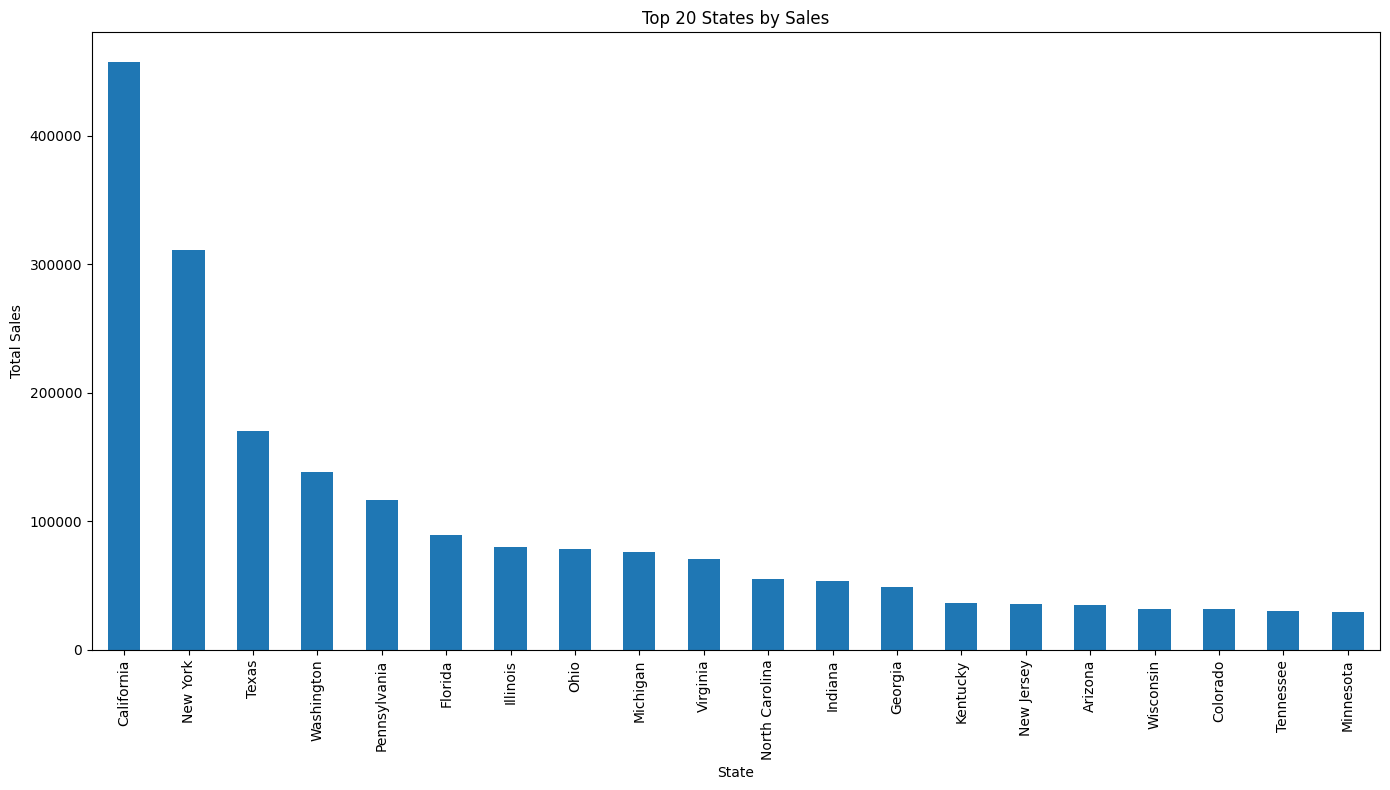

In [ ]:
state_sales = df_new.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
state_sales.head(20).plot(kind='bar')
plt.title('Top 20 States by Sales')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.tight_layout()

**Compare New York vs California (Sales & Profit)**

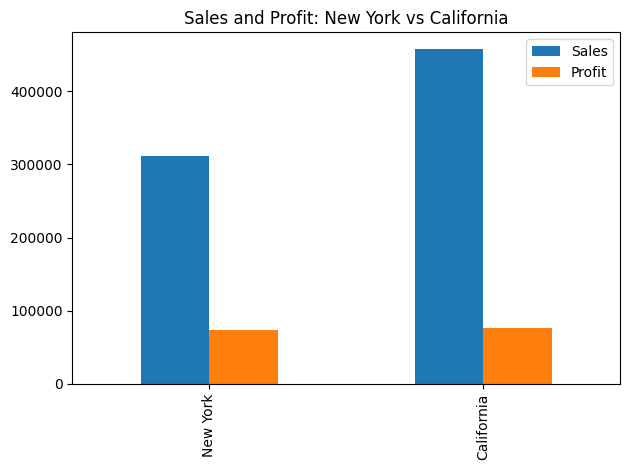

In [ ]:
ny = df_new[df_new['State'].str.lower() == 'new york']
ca = df_new[df_new['State'].str.lower() == 'california']


summary = pd.DataFrame({
'Sales': [ny['Sales'].sum(), ca['Sales'].sum()],
'Profit': [ny['Profit'].sum(), ca['Profit'].sum()]
}, index=['New York','California'])


summary

# Bar chart comparison
summary.plot(kind='bar', stacked=False)
plt.title('Sales and Profit: New York vs California')
plt.tight_layout()


**Outstanding customer(s) in New York**

In [ ]:
ny_customers = ny.groupby(['Customer ID','Customer Name'])[['Sales','Profit']].sum()
ny_customers = ny_customers.sort_values('Sales', ascending=False).reset_index()
ny_customers.head(10)

,Customer ID,Customer Name,Sales,Profit
0,TA-21385,Tom Ashbrook,13723.498,4599.2073
1,PF-19120,Peter Fuller,7678.228,543.2819
2,SV-20365,Seth Vernon,7359.918,1571.7964
3,TB-21400,Tom Boeckenhauer,6999.960,2239.9872
4,GT-14710,Greg Tran,6712.744,774.7935
5,TS-21370,Todd Sumrall,6492.314,1574.9714
6,KD-16270,Karen Daniels,6241.282,2283.0463
7,KD-16495,Keith Dawkins,5854.194,2510.8903
8,LW-17215,Luke Weiss,5048.186,773.1004
9,CJ-12010,Caroline Jumper,5012.760,1300.0330


**Are there differences among states in profitability?**

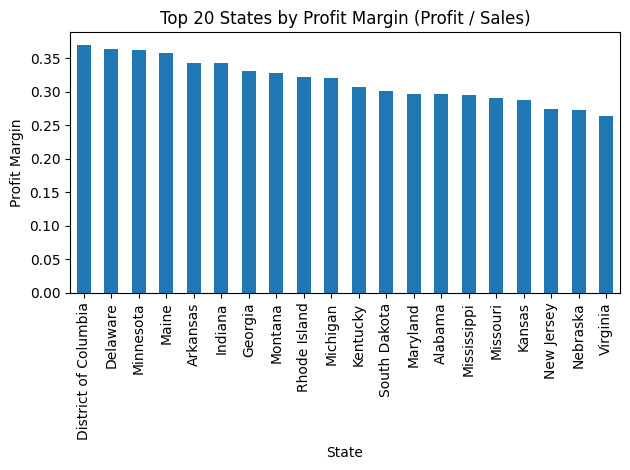

In [ ]:
state_summary = df_new.groupby('State').agg({'Sales':'sum','Profit':'sum'})
state_summary['Profit_Margin'] = state_summary['Profit'] / state_summary['Sales']
state_summary = state_summary.sort_values('Profit_Margin', ascending=False)
state_summary.head(20)


# Plot margins
state_summary['Profit_Margin'].head(20).plot(kind='bar')
plt.title('Top 20 States by Profit Margin (Profit / Sales)')
plt.ylabel('Profit Margin')
plt.tight_layout()

**Pareto Principle: Do 20% of customers contribute 80% of profit?**

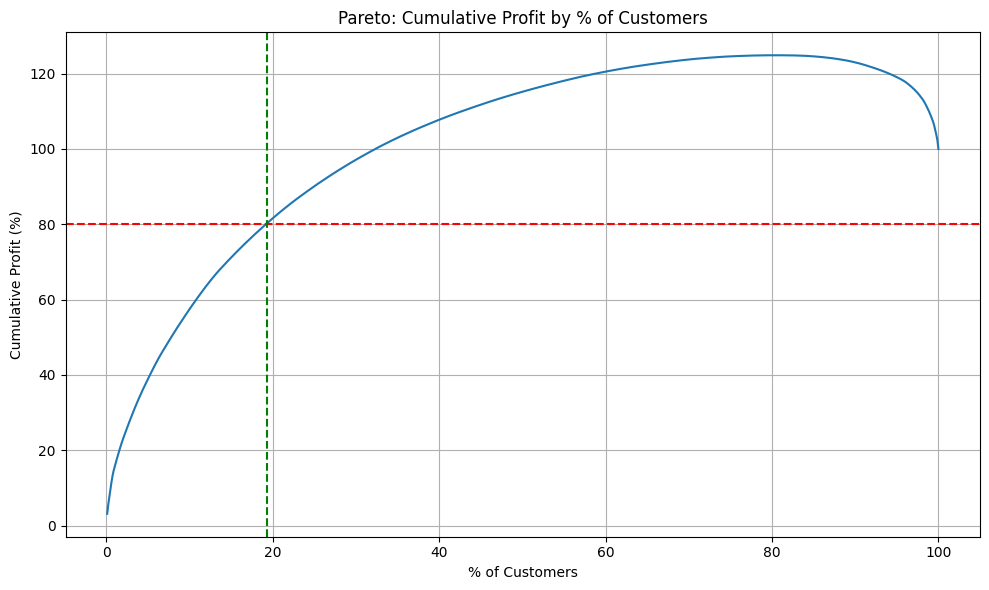

In [ ]:
cust_profit = df_new.groupby('Customer ID').agg({'Profit':'sum'}).sort_values('Profit', ascending=False).reset_index()


cust_profit['cum_profit'] = cust_profit['Profit'].cumsum()
total_profit = cust_profit['Profit'].sum()
cust_profit['cum_profit_pct'] = cust_profit['cum_profit'] / total_profit * 100
cust_profit['cust_pct'] = (np.arange(1, len(cust_profit)+1) / len(cust_profit)) * 100


# find where cumulative profit reaches 80%
idx_80 = cust_profit[cust_profit['cum_profit_pct'] >= 80].index.min()
percent_customers_for_80 = cust_profit.loc[idx_80, 'cust_pct']
percent_customers_for_80


# Plot cumulative curve
plt.figure(figsize=(10,6))
plt.plot(cust_profit['cust_pct'], cust_profit['cum_profit_pct'])
plt.axhline(80, color='r', linestyle='--')
plt.axvline(percent_customers_for_80, color='g', linestyle='--')
plt.title('Pareto: Cumulative Profit by % of Customers')
plt.xlabel('% of Customers')
plt.ylabel('Cumulative Profit (%)')
plt.grid(True)
plt.tight_layout()

**Top 20 cities by Sales and by Profit**

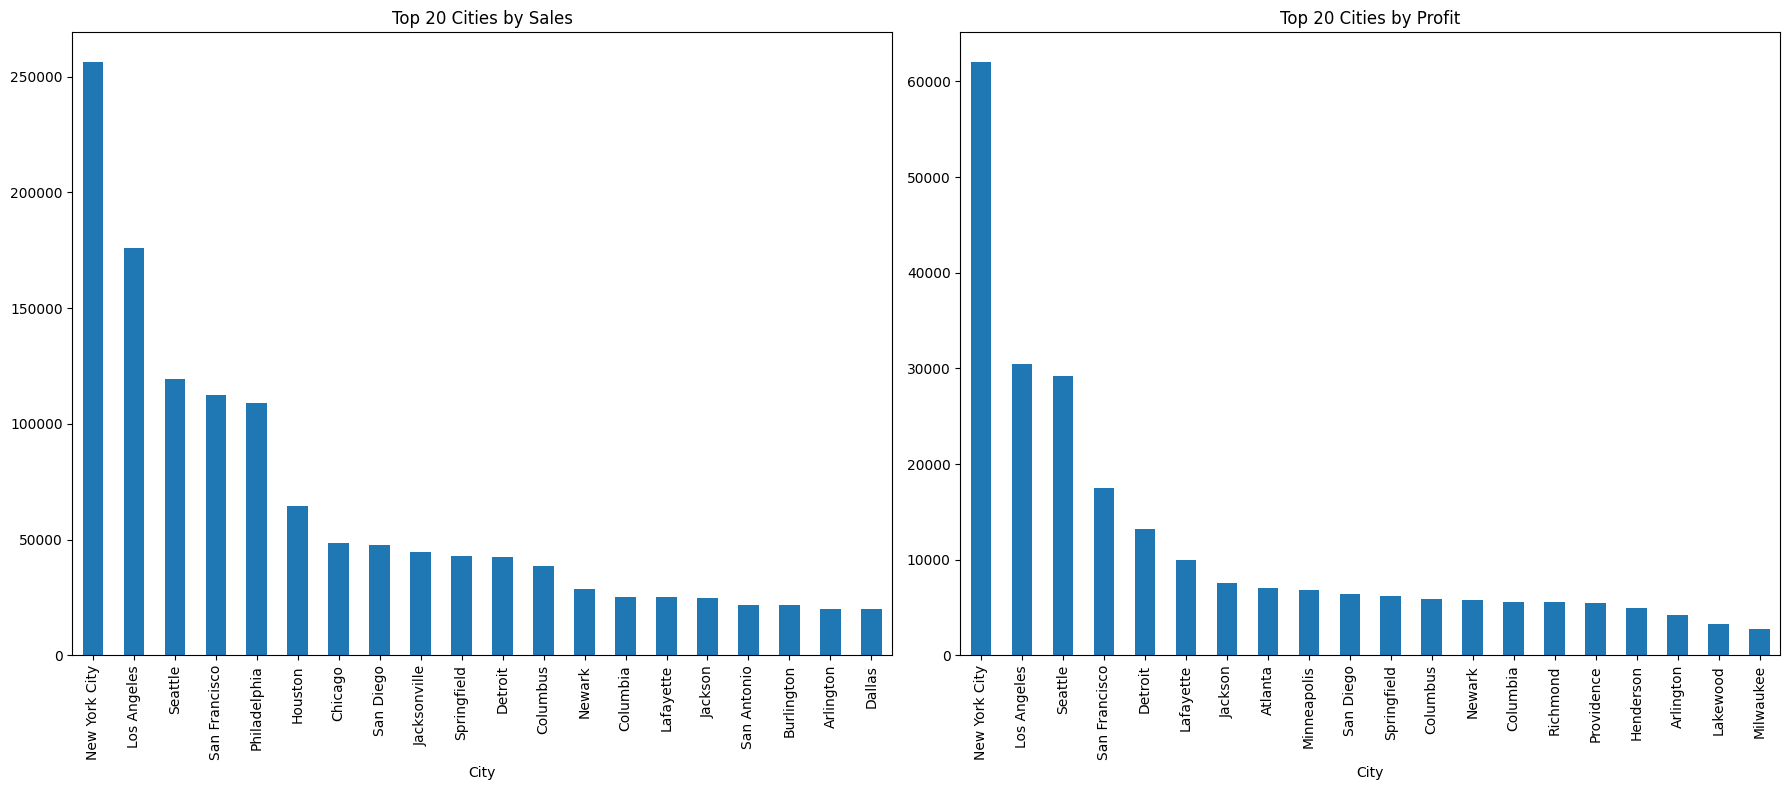

In [ ]:
city_sales = df_new.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
city_profit = df_new.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)


# Combine and compare
top_cities = pd.DataFrame({'Sales': city_sales, 'Profit': city_profit}).fillna(0)


# plot side-by-side
fig, axes = plt.subplots(1,2, figsize=(18,8))
city_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 20 Cities by Sales')


city_profit.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 20 Cities by Profit')
plt.tight_layout()

**Top 20 customers by Sales**

In [ ]:
top_customers_sales = df.groupby(['Customer ID','Customer Name'])['Sales'].sum().sort_values(ascending=False).head(20)
top_customers_sales

,,Sales
Customer ID,Customer Name,
SM-20320,Sean Miller,25043.050
TC-20980,Tamara Chand,19052.218
RB-19360,Raymond Buch,15117.339
TA-21385,Tom Ashbrook,14595.620
AB-10105,Adrian Barton,14473.571
KL-16645,Ken Lonsdale,14175.229
SC-20095,Sanjit Chand,14142.334
HL-15040,Hunter Lopez,12873.298
SE-20110,Sanjit Engle,12209.438


**Cumulative curve in Sales by Customers (Pareto on Sales)**

np.float64(49.93694829760403)

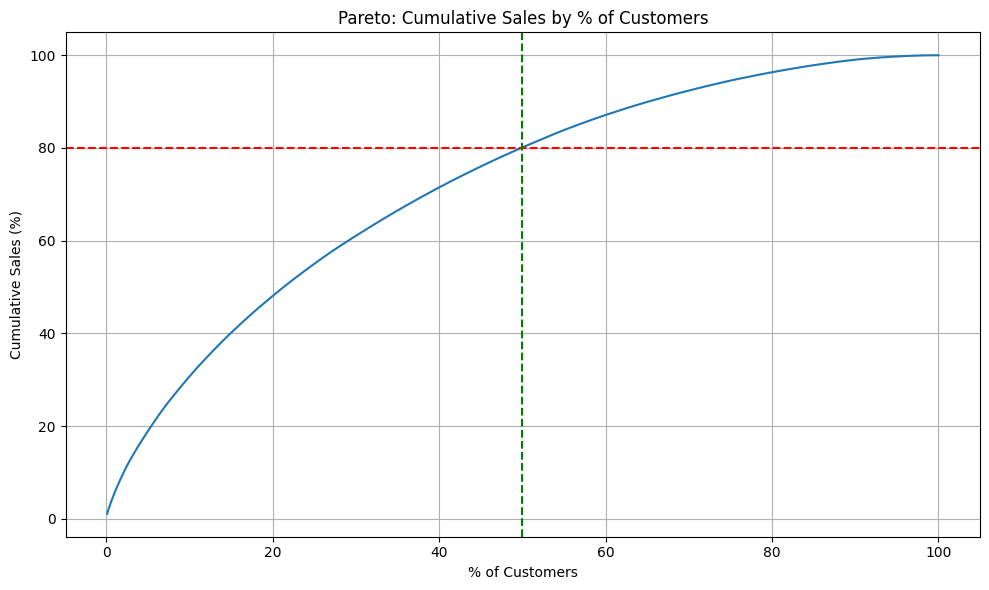

In [ ]:
cust_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).reset_index()


cust_sales['cum_sales'] = cust_sales['Sales'].cumsum()
total_sales = cust_sales['Sales'].sum()
cust_sales['cum_sales_pct'] = cust_sales['cum_sales'] / total_sales * 100
cust_sales['cust_pct'] = (np.arange(1, len(cust_sales)+1) / len(cust_sales)) * 100


idx_80_sales = cust_sales[cust_sales['cum_sales_pct'] >= 80].index.min()
percent_customers_for_80_sales = cust_sales.loc[idx_80_sales, 'cust_pct']


plt.figure(figsize=(10,6))
plt.plot(cust_sales['cust_pct'], cust_sales['cum_sales_pct'])
plt.axhline(80, color='r', linestyle='--')
plt.axvline(percent_customers_for_80_sales, color='g', linestyle='--')
plt.title('Pareto: Cumulative Sales by % of Customers')
plt.xlabel('% of Customers')
plt.ylabel('Cumulative Sales (%)')
plt.grid(True)
plt.tight_layout()


percent_customers_for_80_sales

**Extras (time series analysis)**

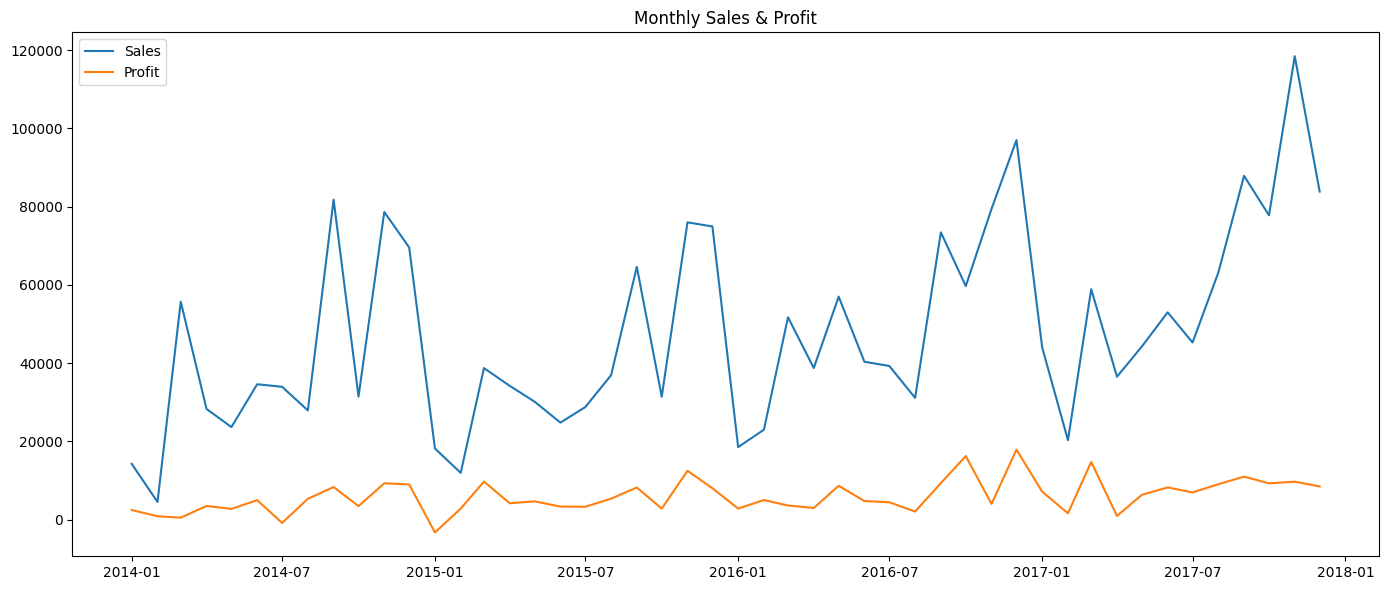

In [ ]:
# monthly sales/profit time series
monthly = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales':'sum','Profit':'sum'}).reset_index()
monthly['Order Date'] = monthly['Order Date'].dt.to_timestamp()


plt.figure(figsize=(14,6))
plt.plot(monthly['Order Date'], monthly['Sales'], label='Sales')
plt.plot(monthly['Order Date'], monthly['Profit'], label='Profit')
plt.legend()
plt.title('Monthly Sales & Profit')
plt.tight_layout()